In [1]:
%matplotlib inline

import rdkit # compchem library
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole # use this to draw molecules in the notebook
from rdkit import rdBase
print(rdBase.rdkitVersion)

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

2018.09.1


Data for this exercise taken from the [DUD-E validation dataset](http://dude.docking.org/targets/try1).

In [2]:
def get_mols(smi_file):
    mols = []
    with open(smi_file) as f:
        for l in f:
            mols.append(l.split()[0])
    return mols

In [3]:
n = 200 # balance sets equally
actives = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_actives_final.ism')[:n] ]
decoys = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_decoys_final.ism')[:n] ]

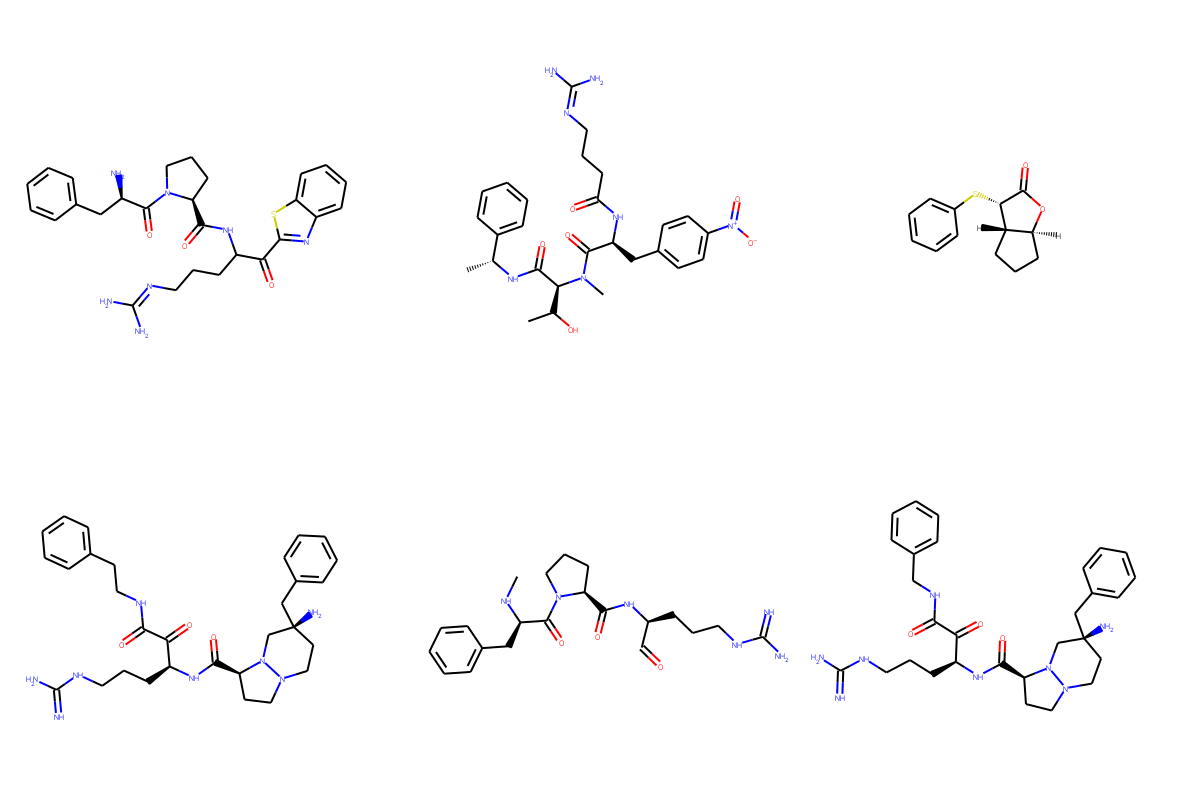

In [4]:
img = Draw.MolsToGridImage( actives[:6], molsPerRow=3, subImgSize=(400, 400))
img

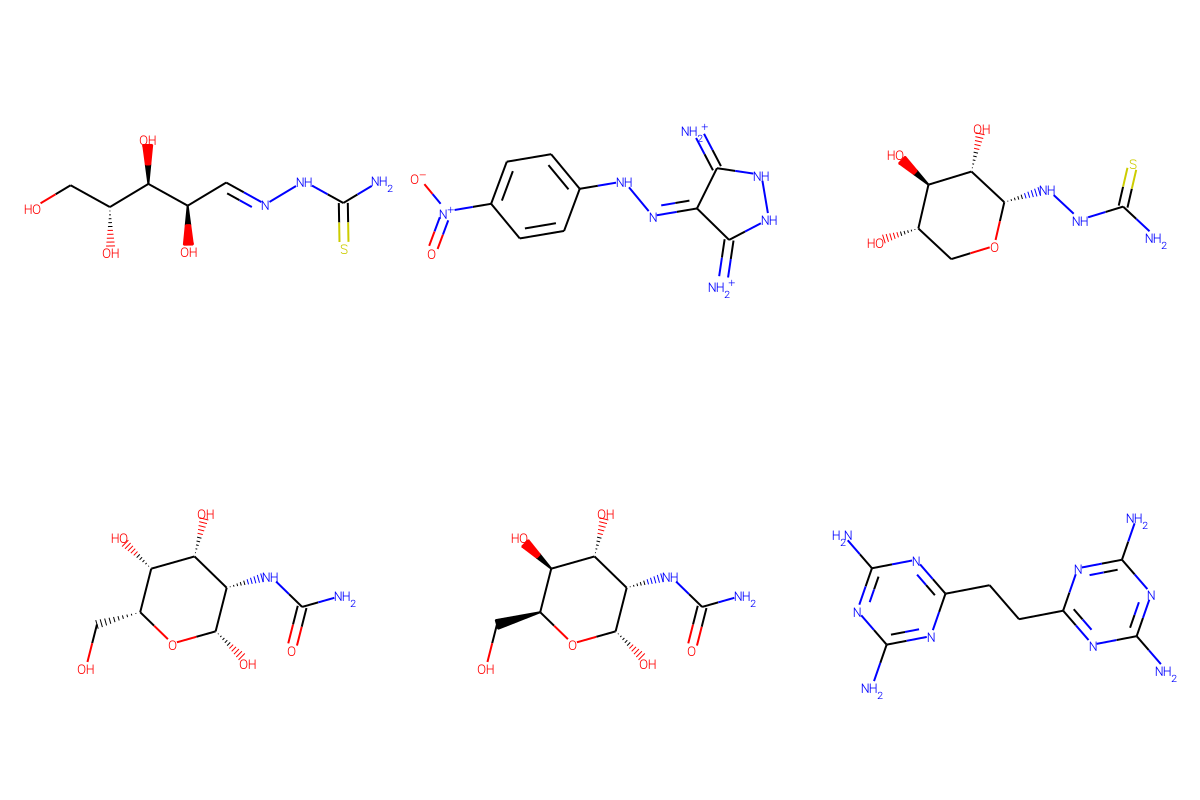

In [5]:
img = Draw.MolsToGridImage( decoys[:6], molsPerRow=3, subImgSize=(400, 400))
img

We need to generate properties for each molecule in the actives and decoy testing sets. <font color="red">Warning: This is sloppy programming!</font>

In [6]:
mol = pd.Series(decoys + actives)
target_classes = np.array(['DECOY', 'ACTIVE'])
mol_labels = pd.Series(([target_classes[0]] * n) + ([target_classes[1]] * n))
df = pd.DataFrame()
df['molecule'] = mol
df['class'] = mol_labels
df['heavy_atom_count'] = [ float(Descriptors.HeavyAtomCount(m)) for m in df['molecule'] ]
df['heteroatoms_count'] = [ float(Descriptors.NumHeteroatoms(m)) for m in df['molecule'] ]
df['mol_weight'] = [ Descriptors.MolWt(m) for m in df['molecule'] ]
df['rot_bonds'] =  [ float(Descriptors.NumRotatableBonds(m)) for m in df['molecule'] ]
df['h_donors'] =   [ float(Descriptors.NumHDonors(m)) for m in df['molecule'] ]
df['h_acceptors'] = [ float(Descriptors.NumHAcceptors(m)) for m in df['molecule'] ]
df['log_p'] = [ Descriptors.MolLogP(m) for m in df['molecule'] ]
df['balabanj'] = [ Descriptors.BalabanJ(m) for m in df['molecule'] ]
df['mol_mr'] = [ Descriptors.MolMR(m) for m in df['molecule'] ] # molar refractivity
df['ring_count'] = [ float(Descriptors.RingCount(m)) for m in df['molecule'] ]
df['ring_aromatic'] = [ float(Descriptors.NumAromaticRings(m)) for m in df['molecule'] ]
df['ring_saturated'] = [ float(Descriptors.NumSaturatedRings(m)) for m in df['molecule'] ]
df['ring_aliphatic'] = [ float(Descriptors.NumAliphaticRings(m)) for m in df['molecule'] ]
df['tpsa'] = [ Descriptors.TPSA(m) for m in df['molecule'] ]
df['chi0'] = [ Descriptors.Chi0(m) for m in df['molecule'] ]
df['chi1'] = [ Descriptors.Chi1(m) for m in df['molecule'] ]
df['nhoh'] = [ float(Descriptors.NHOHCount(m)) for m in df['molecule'] ]
df['no'] = [ float(Descriptors.NOCount(m)) for m in df['molecule'] ]
#df['amide_bonds'] = [ Descriptors.NumAmideBonds(m) for m in df['molecule'] ]
df['csp3'] = [ Descriptors.FractionCSP3(m) for m in df['molecule'] ]
df['hallkieralpha'] = [ Descriptors.HallKierAlpha(m) for m in df['molecule'] ]
df['ipc'] = [ Descriptors.Ipc(m) for m in df['molecule'] ]
df['bertzct'] = [ Descriptors.BertzCT(m) for m in df['molecule'] ]
df['qed'] = [ Descriptors.qed(m) for m in df['molecule'] ]
df['kappa1'] = [ Descriptors.Kappa1(m) for m in df['molecule'] ]
df['kappa2'] = [ Descriptors.Kappa2(m) for m in df['molecule'] ]
df['kappa3'] = [ Descriptors.Kappa3(m) for m in df['molecule'] ]
df

,molecule,class,heavy_atom_count,heteroatoms_count,mol_weight,rot_bonds,h_donors,h_acceptors,log_p,balabanj,...,nhoh,no,csp3,hallkieralpha,ipc,bertzct,qed,kappa1,kappa2,kappa3
0,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec300>,DECOY,14.0,8.0,223.254,5.0,6.0,6.0,-3.11960,3.993830,...,7.0,7.0,0.666667,-0.80,8.634210e+02,213.253298,0.165010,13.200000,6.623823,5.043490
1,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec350>,DECOY,18.0,9.0,249.234,3.0,5.0,4.0,-3.21430,2.103874,...,7.0,9.0,0.000000,-2.97,1.428210e+04,530.539508,0.282776,11.513498,4.491161,2.237596
2,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec3a0>,DECOY,14.0,8.0,223.254,2.0,6.0,6.0,-3.23680,2.422963,...,7.0,7.0,0.833333,-0.51,1.140633e+03,217.253298,0.213402,11.564129,4.823127,2.737778
3,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec3f0>,DECOY,15.0,8.0,222.197,2.0,6.0,6.0,-3.54540,2.697922,...,7.0,8.0,0.857143,-0.93,1.738804e+03,237.520300,0.285119,12.141073,4.727106,2.548368
4,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec440>,DECOY,15.0,8.0,222.197,2.0,6.0,6.0,-3.54540,2.697922,...,7.0,8.0,0.857143,-0.93,1.738804e+03,237.520300,0.285119,12.141073,4.727106,2.548368
5,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec490>,DECOY,18.0,10.0,248.254,3.0,4.0,10.0,-1.82940,2.107230,...,8.0,10.0,0.250000,-2.78,9.916675e+03,475.799292,0.481564,11.698014,4.609333,2.871498
6,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec4e0>,DECOY,15.0,8.0,222.197,2.0,6.0,6.0,-3.54540,2.690824,...,7.0,8.0,0.857143,-0.93,1.758779e+03,235.520300,0.285119,12.141073,4.727106,2.548368
7,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec530>,DECOY,23.0,11.0,342.297,4.0,8.0,11.0,-5.39720,2.114862,...,8.0,11.0,1.000000,-0.44,1.087117e+05,378.018438,0.243258,18.892352,7.630404,3.646723
8,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec580>,DECOY,16.0,6.0,232.328,4.0,4.0,2.0,-2.33320,4.066309,...,8.0,6.0,0.800000,-1.14,1.921062e+03,227.203584,0.407180,14.860000,6.444093,4.586188
9,<rdkit.Chem.rdchem.Mol object at 0x7f6bb92ec5d0>,DECOY,22.0,9.0,322.334,3.0,8.0,8.0,-5.23910,2.158643,...,9.0,9.0,0.846154,-0.62,6.281321e+04,418.844270,0.238485,17.729476,6.869720,3.179185


In [7]:
features = df.columns[2:]
# View features names
features

Index(['heavy_atom_count', 'heteroatoms_count', 'mol_weight', 'rot_bonds',
       'h_donors', 'h_acceptors', 'log_p', 'balabanj', 'mol_mr', 'ring_count',
       'ring_aromatic', 'ring_saturated', 'ring_aliphatic', 'tpsa', 'chi0',
       'chi1', 'nhoh', 'no', 'csp3', 'hallkieralpha', 'ipc', 'bertzct', 'qed',
       'kappa1', 'kappa2', 'kappa3'],
      dtype='object')

In [8]:
y = np.array([1 if cls == "ACTIVE" else 0 for cls in df['class']])
target_names = np.array(["ACTIVE", "DECOY"])

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def nd_pca(data, dim):
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=dim))])
    X_t = pipeline.fit_transform(data)    
    print('explained variance ratio (first two components): %s' % str(pipeline.named_steps['pca'].explained_variance_ratio_))
    return X_t

explained variance ratio (first two components): [0.47301537 0.19583274]


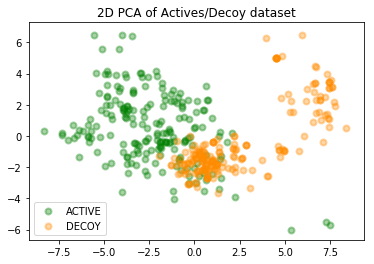

In [10]:
X = df[features]
X_t_2d = nd_pca(X, 2)

import pylab as plt
plt.figure()
colors = ['green', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [1, 0], target_names):
    plt.scatter(X_t_2d[y == i, 0], X_t_2d[y == i, 1], color=color, alpha=.35, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('2D PCA of Actives/Decoy dataset')
plt.show()

In [11]:
X = df[features]
X_t_3d = nd_pca(X, 3)

explained variance ratio (first two components): [0.47301537 0.19583274 0.11029992]


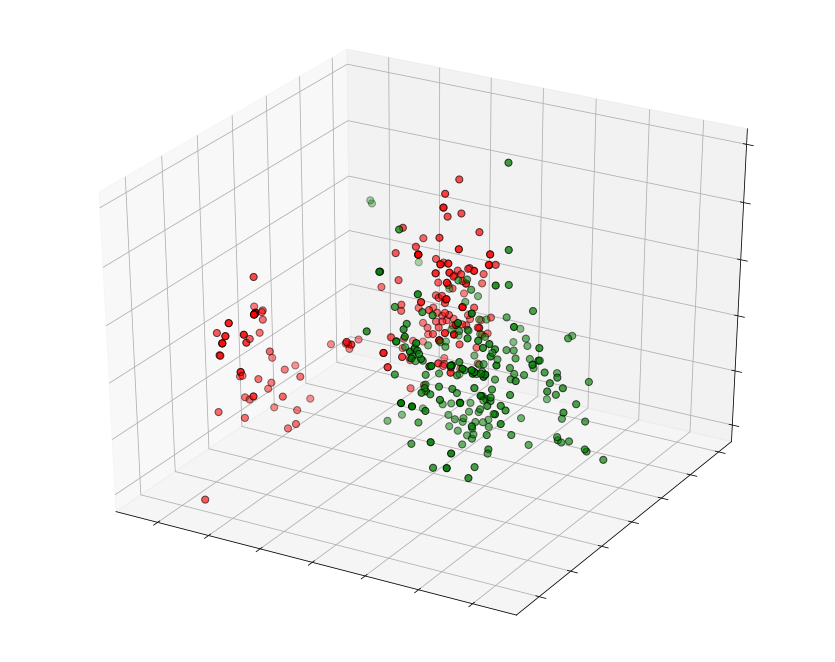

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -2], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)


# Reorder the labels to have colors matching the cluster results
y = np.array(['g' if cls == "ACTIVE" else 'r' for cls in df['class']])
ax.scatter(X_t_3d[:, 0], X_t_3d[:, 1], X_t_3d[:, 2], c=y, s=50, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Practical Tasks

* How would you use PCA (dimensionality reduction) in an ML model?